Valuing Performance: Analyzing NBA Salaries in Relation to On-Court Metrics

By: Peyton Chang amd Tyler Braisted

Introduction

The NBA is home to some of the most highly skilled and well-compensated athletes in the world. Player salaries can vary widely, from minimum contracts to multi-million-dollar deals for superstar players. However, determining whether a player is worth their salary can be a lofty task that requires more than just a look at their points per game or other basic statistics. To make a comprehensive assessment, we need to consider a wide range of performance metrics and contextual factors.

In this tutorial, we will look at some of the top NBA players from the 2023 season and analyze how their performance relates to the salaries that they received. Are the most efficient players the ones who get paid the most? 

In this tutorial, we will leverage a dataset containing detailed information on NBA player salaries and comprehensive player statistics. Our goal is to perform a thorough data analysis to identify which NBA players provide the most value relative to their salaries. Specifically, we will:

By following this structured approach, we aim to uncover which NBA players are delivering the best performance for their salary and which players might be considered overpaid. This analysis will not only help fans and analysts gain deeper insights into player value but also provide a data-driven perspective that teams could potentially use for future contract negotiations and roster decisions.

Let's dive in and begin our journey to understand the true worth of NBA players relative to their salaries. 


In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import statsmodels.api as sm


Part 1: Data Collection and Management

Collecting Data:

To get started, we want to import a data set that contains information regarding NBA players' stats and salaries. We did this by finding a CSV database on Kaggle.com and reading it into a pandas data frame. A CSV (Comma Separated Values) file is a plain text file that can store data, where each line essentially represents a row of data, and values within each line are separated by commas. To learn more about CSVs, check out: https://flatfile.com/blog/what-is-a-csv-file-guide-to-uses-and-benefits/

In [2]:
data = pd.read_csv('2023PlayerStatsAndSalaries.csv')

# Display the first few rows of the dataset to get an overview
print("First few rows of the dataset:")
print(data.head())


First few rows of the dataset:
   Unnamed: 0        Player Name    Salary Position  Age     Team  GP  GS  \
0           0      Stephen Curry  48070014       PG   34      GSW  56  56   
1           1          John Wall  47345760       PG   32      LAC  34   3   
2           2  Russell Westbrook  47080179       PG   34  LAL/LAC  73  24   
3           3       LeBron James  44474988       PF   38      LAL  55  54   
4           4       Kevin Durant  44119845       PF   34  BRK/PHO  47  47   

     MP    FG  ...  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP  
0  34.7  10.0  ...  12.5  31.0  5.8  2.0  7.8  0.192   7.5   0.1  7.5   4.7  
1  22.2   4.1  ...  17.1  27.0 -0.4  0.7  0.3  0.020  -0.8  -0.4 -1.2   0.1  
2  29.1   5.9  ...  18.4  27.7 -0.6  2.6  1.9  0.044   0.3  -0.1  0.2   1.2  
3  35.5  11.1  ...  11.6  33.3  3.2  2.4  5.6  0.138   5.5   0.6  6.1   4.0  
4  35.6  10.3  ...  13.4  30.7  4.7  2.1  6.8  0.194   6.0   1.2  7.1   3.9  

[5 rows x 52 columns]


Cleaning Data:

Now that we have our data, we want to make sure this data is clean and ready for analysis. In order to do this, there are a few things we can do, such as check for missing values, ensure that all columns have the correct data types, and find and remove potential duplicate rows. 

Data Cleaning is an important step for any data analysis. It is the process of removing errors, inconsistencies, and incorrect data from a dataset in order to ensure that the data is reliable and ready for analysis. To learn more about data cleaning and how it's useful, read this article: https://www.tableau.com/learn/articles/what-is-data-cleaning

In [3]:
# Check for missing values
print(data.isnull().sum())

# Correct data types if necessary, especially for the PTS column which is critical here
data['PTS'] = pd.to_numeric(data['PTS'], errors='coerce')


# Ensure there are no missing values in key columns like PTS
data.dropna(subset=['PTS'], inplace=True)

# Check for any duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Unnamed: 0        0
Player Name       0
Salary            0
Position          0
Age               0
Team              0
GP                0
GS                0
MP                0
FG                0
FGA               0
FG%               1
3P                0
3PA               0
3P%              13
2P                0
2PA               0
2P%               4
eFG%              1
FT                0
FTA               0
FT%              23
ORB               0
DRB               0
TRB               0
AST               0
STL               0
BLK               0
TOV               0
PF                0
PTS               0
Total Minutes     0
PER               0
TS%               1
3PAr              1
FTr               1
ORB%              0
DRB%              0
TRB%              0
AST%              0
STL%              0
BLK%              0
TOV%              0
USG%              0
OWS               0
DWS               0
WS                0
WS/48             0
OBPM              0
DBPM              0


Before we can analyze this data, we wanted to narrow down the dataset so that we only considered the most productive NBA players. We did this because we set out to find who the most efficient players are based on their salaries. This means that we wanted to ignore the least productive players in the league as these players won't be among the most efficient. This focus allows for an initial overview of high-impact players who are often central to discussions about performance and compensation.

To do this, we sorted the data by points scored and selected the top 100 players. By focusing on these top scorers, we ensure that our analysis is centered around players who have a significant impact on the game. We then calculated value metrics such as Points per Dollar and Win Shares per Dollar, which help us understand how well a player’s performance aligns with their salary. Finally, we visualized these metrics to identify the players who provide the best value for their teams.

In [4]:
data = data.sort_values(by='PTS', ascending=False).head(100)

# Select only the 'Player Name' and 'PTS' columns
top_100_scorers = data[['Player Name', 'PTS']]

# Print the formatted table header
print(f"{'Player Name':<25} {'Points Scored':<15}")

# Print each row 
for index, row in top_100_scorers.iterrows():
    print(f"{row['Player Name']:<25} {row['PTS']:<15}")

Player Name               Points Scored  
Joel Embiid               33.1           
Damian Lillard            32.2           
Shai Gilgeous-Alexander   31.4           
Giannis Antetokounmpo     31.1           
Jayson Tatum              30.1           
Stephen Curry             29.4           
Kevin Durant              29.1           
LeBron James              28.9           
Donovan Mitchell          28.3           
Devin Booker              27.8           
Kyrie Irving              27.1           
Jaylen Brown              26.6           
Trae Young                26.2           
Ja Morant                 26.2           
Zion Williamson           26.0           
Anthony Davis             25.9           
Lauri Markkanen           25.6           
Julius Randle             25.1           
De'Aaron Fox              25.0           
Zach LaVine               24.8           
Brandon Ingram            24.7           
Anthony Edwards           24.6           
DeMar DeRozan             24.5    

Part 2: Exploratory Data Analysis

What is Exploratory Data Analysis?


Exploratory Data Analysis is the process of analyzing and visualizing data to better understand the patterns and characteristics of the data. Exploratory Data Analysis consists of finding things like outliers or trends in the data, all in the hope of gaining insights into said data. Some ways to perform Exploratory Data Analysis include finding summary statistics and generating charts based on the data such as scatter plots, histograms, and box plots. 
To learn more about Exploratory Data Analysis, and to see some examples of how to perform it, follow this link: https://www.epa.gov/caddis/exploratory-data-analysis

Our Exploratory Data Analysis:

To begin our exploratory data analysis, we want to create scatter plots to examine the relationship between salaries and various performance metrics like points, Player Efficiency Rating (PER), or Win Shares (WS). This can help identify if higher salaries correspond to higher performance. Scatter plots serve as a useful and powerful visual tool since they can help reveal general trends between a player's performance on the court and their salary. It can further help us gain insight into the effectiveness of salary expenditures. It is essential for basketball team managers and scouts to understand these relationships to optimize team performance. 

NOTE ON STATS: 
PER (Player Efficiency Rating) - a comprehensive statistic that aims to measure how effective a player is by adding their positive statistics (Points, assists, etc.) and subtracting their negative ones (Turnovers, missed shots, etc.)

Win Shares: A statistic that looks to estimate the number of wins that a player contributes to their team based on their performance. It's calculated by using a player's stats (such as points, rebounds, assists) and comparing them to the league average. 

To learn more about these statistics and for more specific information about how they're calculated, follow these links:

https://basketball-reference.com/about/ws.html

https://www.basketball-reference.com/about/per.html


Plotting salary against points scored early in the analysis helps quickly establish whether there is a direct relationship between a player's scoring ability and their compensation. This visual insight sets a foundational understanding for more detailed analyses.

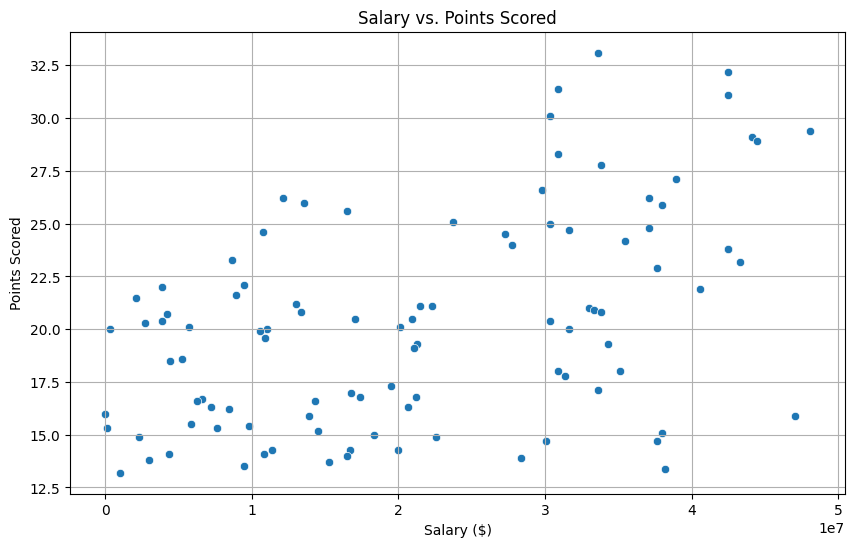

In [5]:
# Ensure correct data types
data['Salary'] = pd.to_numeric(data['Salary'], errors='coerce')
data['PTS'] = pd.to_numeric(data['PTS'], errors='coerce')
data['PER'] = pd.to_numeric(data['PER'], errors='coerce')
data['WS'] = pd.to_numeric(data['WS'], errors='coerce')

# Drop any rows with NaN values in the key columns to avoid plotting errors
data.dropna(subset=['Salary', 'PTS', 'PER', 'WS'], inplace=True)

# Plotting Salary vs. Points Scored
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Salary', y='PTS', data=data)
plt.title('Salary vs. Points Scored')
plt.xlabel('Salary ($)')
plt.ylabel('Points Scored')
plt.grid(True)
plt.show()



Looking at the scatter plot above, we can gain a lot of insight into the data and it's patterns. First off, all the plot has points that aren't tightly clustered and seem to show a relatively weak relationship between their respective variables. However, the strength of the plot is different, as points scored seem to have a strong relationship. Moreover, the graph seems to depict a somewhat positive correlation between it's variable and salary. 

To get a better understanding of the typical salary for an NBA player, we wanted to plot a distribution of all the salaries of the players in our data set. Examining the overall salary distribution provides a broader context for the financial landscape of the league, helping to frame subsequent analyses by understanding the general compensation trends and outliers.

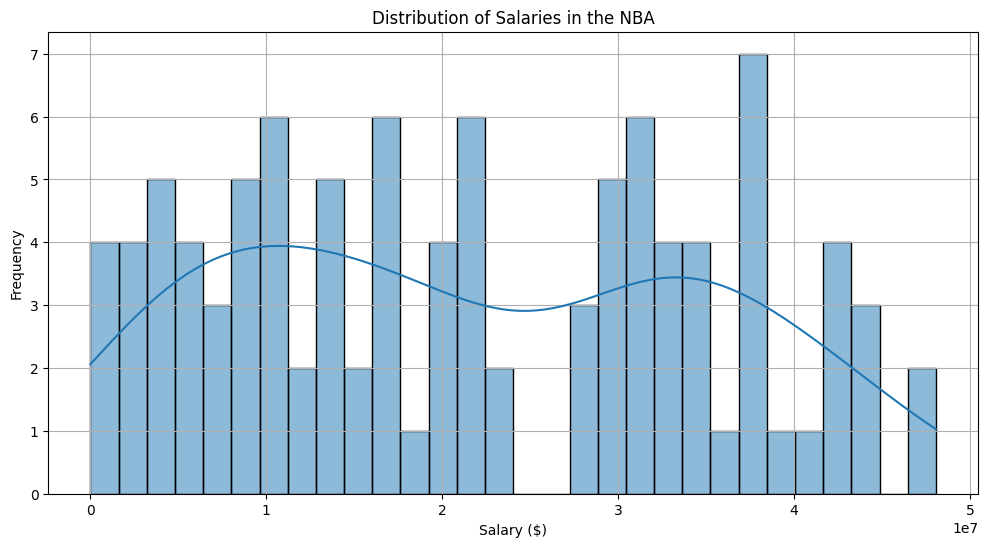

In [6]:
# Convert the 'Salary' column to numeric, handling any non-numeric entries
data['Salary'] = pd.to_numeric(data['Salary'], errors='coerce')

# Drop rows where 'Salary' might be NaN after conversion
data.dropna(subset=['Salary'], inplace=True)

# Plotting the distribution of salaries
plt.figure(figsize=(12, 6))
sns.histplot(data['Salary'], kde=True, bins=30)
plt.title('Distribution of Salaries in the NBA')
plt.xlabel('Salary ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The plot above shows that NBA salaries can vary greatly.

Calculating descriptive statistics and distribution measures for key variables gives a detailed statistical backdrop. This step is essential for understanding the data's central tendencies, variability, and shape of distributions, which informs the appropriateness of further statistical tests and models.

In [7]:
# Convert data to numeric, setting errors='coerce' will convert non-convertible values to NaN
data['Salary'] = pd.to_numeric(data['Salary'], errors='coerce')
data['PTS'] = pd.to_numeric(data['PTS'], errors='coerce')
data['PER'] = pd.to_numeric(data['PER'], errors='coerce')
data['WS'] = pd.to_numeric(data['WS'], errors='coerce')

# Drop any rows with NaN values in these columns if needed
data.dropna(subset=['Salary', 'PTS', 'PER', 'WS'], inplace=True)

# Calculate descriptive statistics
descriptive_stats = data[['Salary', 'PTS', 'PER', 'WS']].describe()

# Print the descriptive statistics
print(descriptive_stats)

# Calculate skewness and kurtosis
stats_skew = data[['Salary', 'PTS', 'PER', 'WS']].apply(skew).to_frame(name='Skew')
stats_kurtosis = data[['Salary', 'PTS', 'PER', 'WS']].apply(kurtosis).to_frame(name='Kurtosis')

# Print skewness and kurtosis
print("Skewness of each variable:")
print(stats_skew)
print("\nKurtosis of each variable:")
print(stats_kurtosis)

             Salary         PTS         PER          WS
count  1.000000e+02  100.000000  100.000000  100.000000
mean   2.149377e+07   20.301000   18.474000    5.175000
std    1.355545e+07    5.005522    4.142381    2.906293
min    5.849000e+03   13.200000    9.400000   -0.100000
25%    9.744966e+06   15.975000   15.475000    2.850000
50%    2.039545e+07   20.050000   17.850000    5.100000
75%    3.340419e+07   23.850000   20.600000    7.400000
max    4.807001e+07   33.100000   31.400000   12.600000
Skewness of each variable:
            Skew
Salary  0.152351
PTS     0.571986
PER     0.698443
WS      0.318179

Kurtosis of each variable:
        Kurtosis
Salary -1.222030
PTS    -0.481915
PER     0.371953
WS     -0.343735


Here we make two plots: Salary vs Player Efficiency Rating (PER) and Salary vs Win Shares. If the plot shows a general positive trend in the Salary vs Player Rating graph it suggests that players get paid more based on their efficiency and therefore players with higher efficiencies will be paid a greater salary. The "Salary vs. Win Shares" plot examines the relationship between the salaries of NBA players and their contributions to team wins, as quantified by Win Shares. A positive correlation in this plot would suggest that players who contribute more to their team's victories are likely to be rewarded with higher salaries, emphasizing the importance of performance that directly impacts winning in salary negotiations.

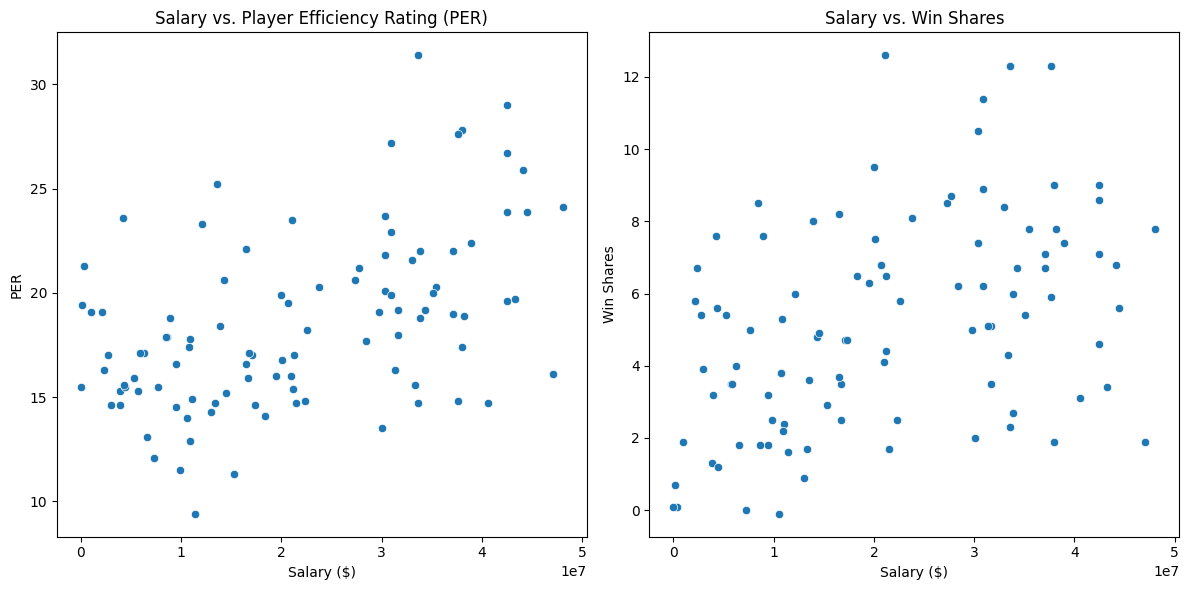

In [8]:
# Convert columns to numeric and handle non-numeric values
data['Salary'] = pd.to_numeric(data['Salary'], errors='coerce')
data['PTS'] = pd.to_numeric(data['PTS'], errors='coerce')
data['PER'] = pd.to_numeric(data['PER'], errors='coerce')
data['WS'] = pd.to_numeric(data['WS'], errors='coerce')

# Drop rows with any NaN values in these columns
data.dropna(subset=['Salary', 'PTS', 'PER', 'WS'], inplace=True)

# Create scatter plots
plt.figure(figsize=(12, 6))

# Scatter plot for Salary vs. PER
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.scatterplot(x='Salary', y='PER', data=data)
plt.title('Salary vs. Player Efficiency Rating (PER)')
plt.xlabel('Salary ($)')
plt.ylabel('PER')

# Scatter plot for Salary vs. Win Shares
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.scatterplot(x='Salary', y='WS', data=data)
plt.title('Salary vs. Win Shares')
plt.xlabel('Salary ($)')
plt.ylabel('Win Shares')

plt.tight_layout()
plt.show()

After analyzing the two plots it is apparent that there is no general trend for either Salary vs. Player Efficiency Rating (PER) or Salary vs Win Shares. This implies that there isn't necessarily a direct correlation between salary and efficiency as well as salary and contribution towards a team. 

Like with salaries, understanding the distribution of these performance metrics helps identify the range and typical values, setting the stage for deeper analysis into how these metrics influence salary.

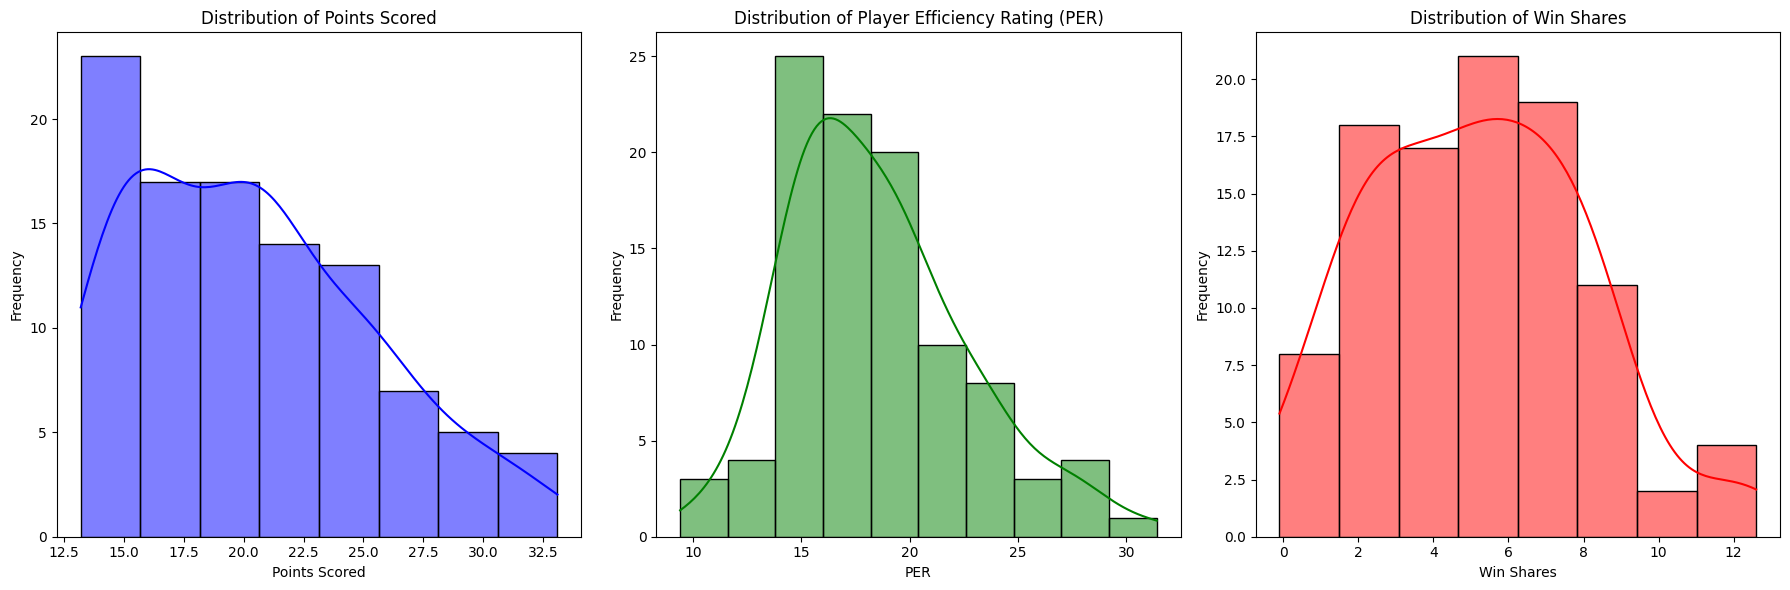

In [9]:
# Create histograms
plt.figure(figsize=(18, 6))

# Histogram for Points Scored
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.histplot(data['PTS'], kde=True, color='blue')
plt.title('Distribution of Points Scored')
plt.xlabel('Points Scored')
plt.ylabel('Frequency')

# Histogram for Player Efficiency Rating (PER)
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.histplot(data['PER'], kde=True, color='green')
plt.title('Distribution of Player Efficiency Rating (PER)')
plt.xlabel('PER')
plt.ylabel('Frequency')

# Histogram for Win Shares
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
sns.histplot(data['WS'], kde=True, color='red')
plt.title('Distribution of Win Shares')
plt.xlabel('Win Shares')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Here we utilize a linear regression model to tell us the extent to which the dependent variable changes when the independent variable(s) change, providing insights into the strength and nature of the associations. Using Ordinary Least Squares (OLS) regression to model relationships quantitatively between salaries and performance metrics establishes if and how strongly these variables predict salaries. This step moves the analysis from descriptive to inferential, allowing for hypothesis testing.



In [10]:
# Simple linear regression with PER as an independent variable
X = sm.add_constant(data['PER'])  # adding a constant
Y = data['Salary']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     30.67
Date:                Sat, 18 May 2024   Prob (F-statistic):           2.56e-07
Time:                        14:45:32   Log-Likelihood:                -1770.0
No. Observations:                 100   AIC:                             3544.
Df Residuals:                      98   BIC:                             3549.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.022e+06   5.46e+06     -1.469      0.1

In linear regression, we plot the observed vs predicted values to validate that the model is appropriate for the data. This can help us determine the value of players and ultimately aid teams in making better, more educated decisions. If the model predictions closely align with the actual salaries, it suggests that the model can be trusted for evaluating how well players are compensated relative to their on-court performance. We also check for homoscedasticity by plotting the residual values with the predicted values. This can help us determine if the variance of errors in the model is consistent or not. Finally, we will use a Q-Q plot to check if the residuals are normally distributed. 

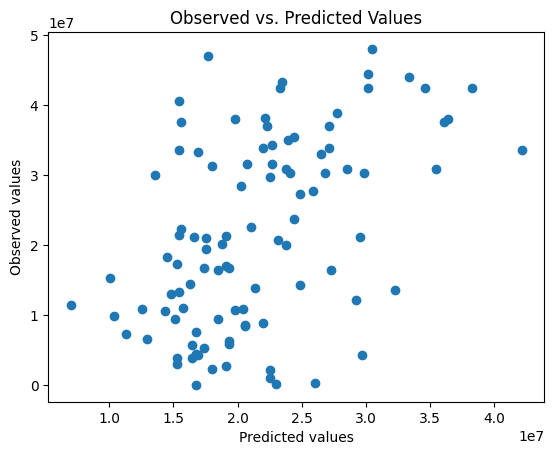

In [11]:
# Define the dependent and independent variables
X = sm.add_constant(data['PER'])  # adding a constant
Y = data['Salary']

# Fit the model
model = sm.OLS(Y, X).fit()

predictions = model.predict(X)
plt.scatter(predictions, Y)
plt.xlabel("Predicted values")
plt.ylabel("Observed values")
plt.title("Observed vs. Predicted Values")
plt.show()

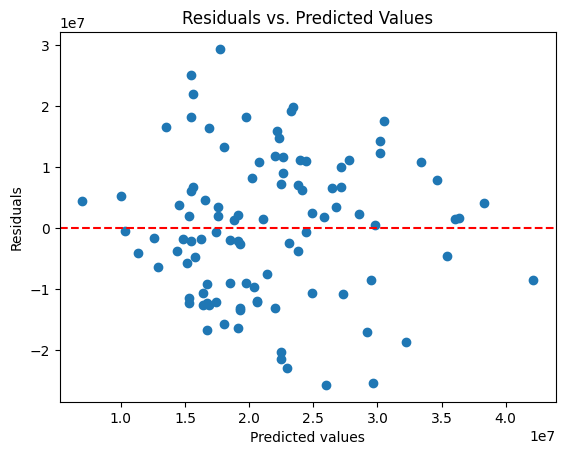

In [12]:
residuals = model.resid
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

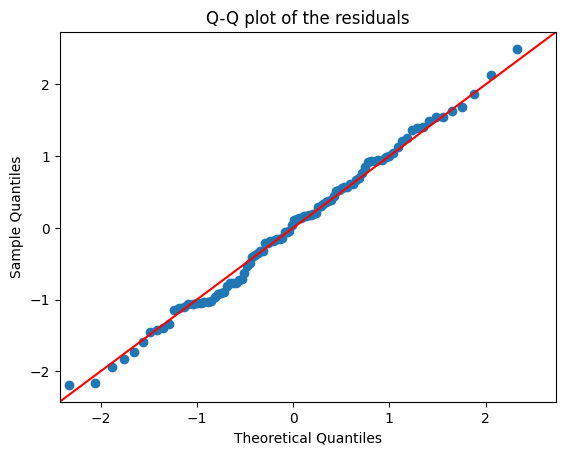

In [13]:
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q plot of the residuals')
plt.show()

Here we plot the distribution of PER among the top 100 scorers and top 20 players by win shares. Focusing on top performers in specific categories can reveal nuances about which aspects of performance are particularly rewarded, offering insights that can influence player management strategies.

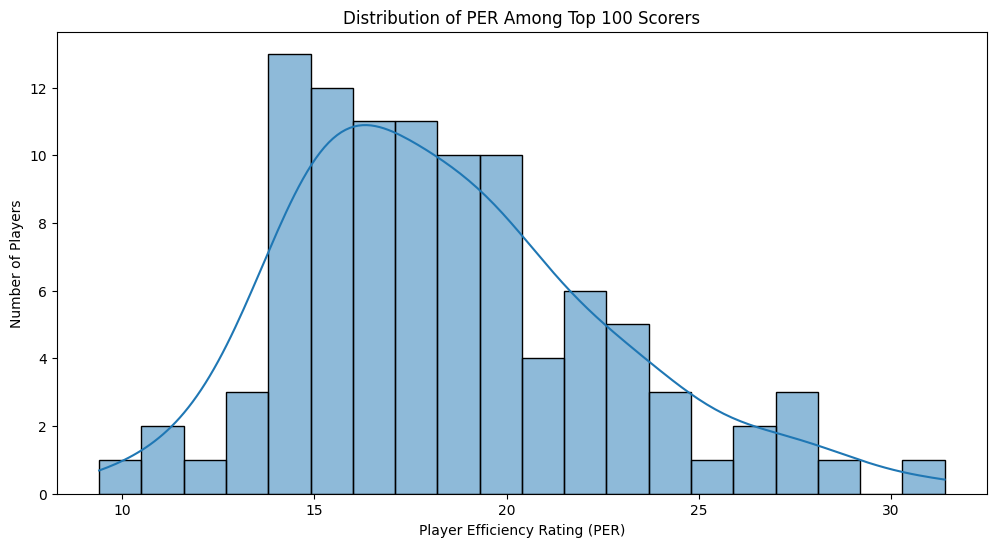

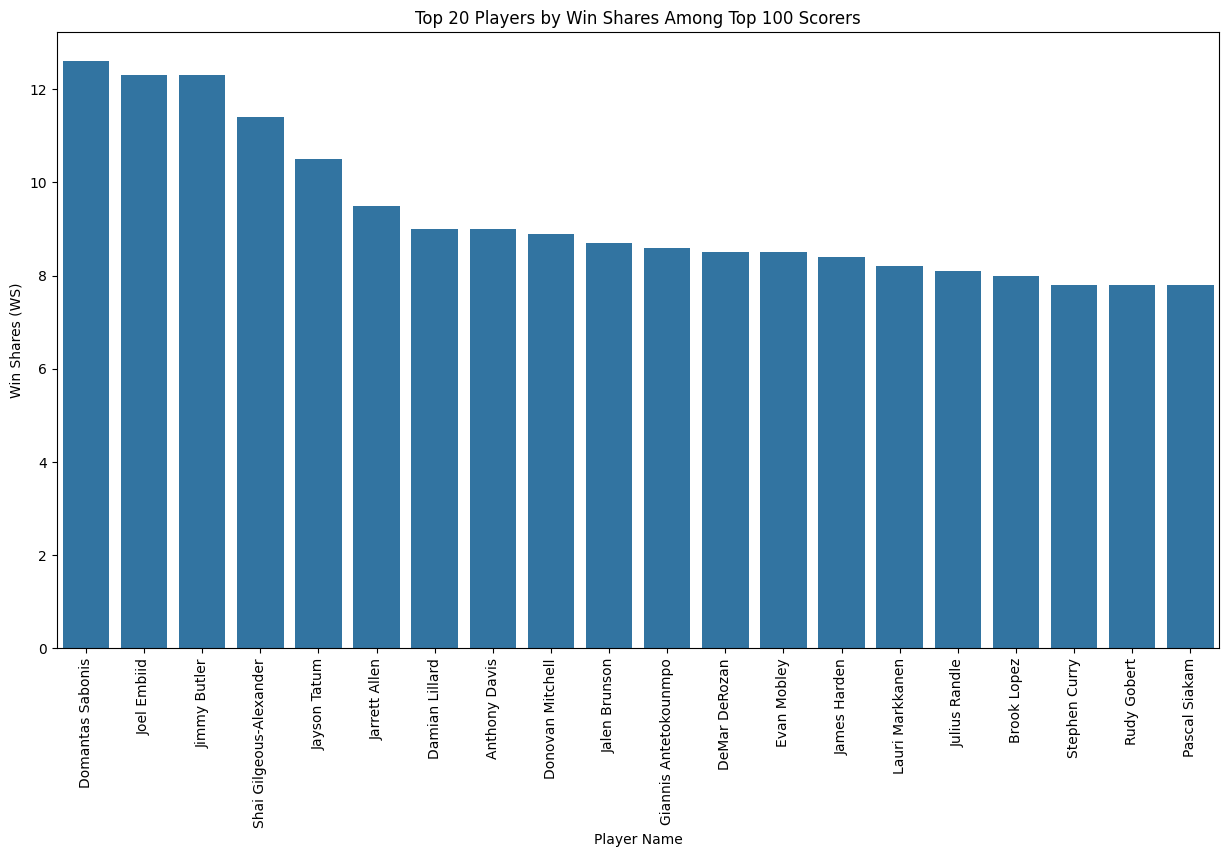

In [14]:
# Sort the data by points scored and select the top 100
top_100_pts = data.sort_values(by='PTS', ascending=False).head(100)

# Visualizing the distribution of Player Efficiency Rating (PER) among the top scorers
plt.figure(figsize=(12, 6))
sns.histplot(top_100_pts['PER'], bins=20, kde=True)
plt.title('Distribution of PER Among Top 100 Scorers')
plt.xlabel('Player Efficiency Rating (PER)')
plt.ylabel('Number of Players')
plt.show()

# Bar plot of total win shares
plt.figure(figsize=(15, 8))
sns.barplot(x='Player Name', y='WS', data=top_100_pts.sort_values(by='WS', ascending=False).head(20))
plt.xticks(rotation=90)
plt.title('Top 20 Players by Win Shares Among Top 100 Scorers')
plt.xlabel('Player Name')
plt.ylabel('Win Shares (WS)')
plt.show()

Part 3: Hypothesis Testing and Machine Learning

What is Hypothesis Testing?


Hypothesis testing is a statistical technique that's used to check the validity of a statement about a population using sample data. It involves comparing observed data to what would be expected under a null hypothesis, allowing us to determine whether there is enough evidence to reject the null hypothesis in favor of an alternative hypothesis, thereby drawing conclusions about the population. If you want to learn more about hypothesis testing and see some examples of it, follow this link: https://www.investopedia.com/terms/h/hypothesistesting.asp

The null hypothesis that we are looking to validate or reject is that there is no correlation between player salary and their own court performance metrics. In order to test this null hypothesis, we decided on the typical 0.05 significance level.

Now we will reinforce our earlier analyses by visually and statistically confirming the relationship between PER and salary, providing a clear linear model that highlights trends and potential outliers.



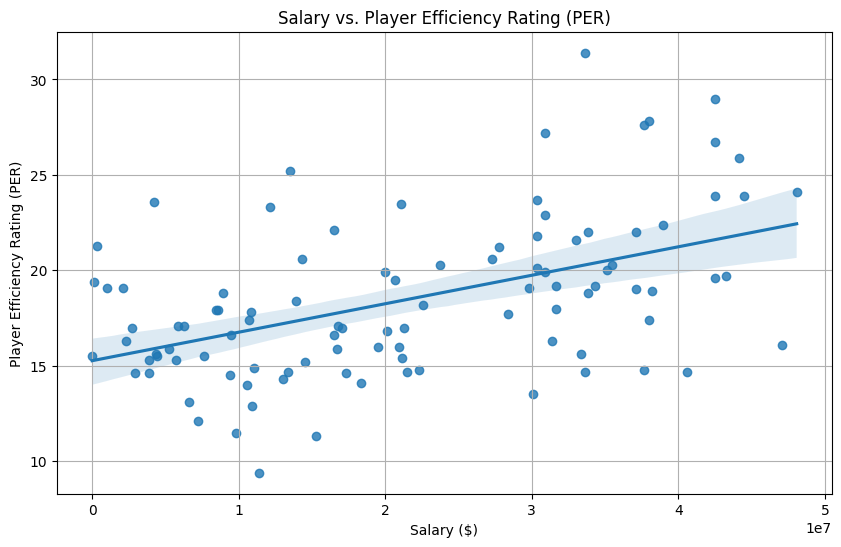

In [15]:
# Plotting Salary vs. Player Efficiency Rating (PER) with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Salary', y='PER', data=data)
plt.title('Salary vs. Player Efficiency Rating (PER)')
plt.xlabel('Salary ($)')
plt.ylabel('Player Efficiency Rating (PER)')
plt.grid(True)
plt.show()

Now it's time to check our null hypotheses and see if we can accept or reject them. The way we do this is by calculating the p-value for each set of variables. A p-value is essentially the probability of obtaining the observed results, or more extreme results, assuming the null hypothesis is true. Therefore, a low p-value means that the null hypothesis is likely not true, while a higher p-value indicates the null hypothesis is more likely to be true.

After calculating the p-value for each set of variables, we compare these p-values to a pre-determined significance level (in this case 0.05). If the p-value is less than the significance level, typically denoted as 𝛼, we reject the null hypothesis, indicating that there is sufficient evidence to suggest a significant relationship between the variables. Conversely, if the p-value is greater than 
𝛼, we fail to reject the null hypothesis, implying that there is not enough evidence to conclude a significant relationship. Therefore, by evaluating p-values against the significance level, we can confirm or reject null hypotheses and make informed decisions about the relationships between variables in our analysis.

In [16]:
from scipy import stats

# Calculate the Pearson correlation coefficient and p-value
pearson_corr, p_value = stats.pearsonr(data['PER'], data['Salary'])

# Print the results
print("P-value for Player Efficiency Rating (PER) vs. Salary:", p_value)

P-value for Player Efficiency Rating (PER) vs. Salary: 2.5644972924671287e-07


In [17]:
# Calculate the Pearson correlation coefficient and p-value for Points (PTS) and Salary
pearson_corr_pts, p_value_pts = stats.pearsonr(data['PTS'], data['Salary'])

# Print the results
print("P-value for Points (PTS) vs. Salary:", p_value_pts)

P-value for Points (PTS) vs. Salary: 3.3361389401734297e-07


In [18]:
# Calculate the Pearson correlation coefficient and p-value for Win Shares (WS) and Salary
pearson_corr_ws, p_value_ws = stats.pearsonr(data['WS'], data['Salary'])
print("P-value for Win Shares (WS) vs. Salary:", p_value_ws)

P-value for Win Shares (WS) vs. Salary: 6.7258729922574655e-06


Part 4: Conclusion

In conclusion, we have found that there is a significant relationship between performance metrics and salaries of NBA players. Unlike the discovery made in the Moneyball, the most paid players in the league are the most efficient and bring the most success to their teams. The p-values we have obtained for the relationships between player Efficiency Rating (PER), Points (PTS), and Win Shares (WS) with Salary are all extremely small, indicating a strong relationship. Based on these p-values, we can conclude that all three performance metrics—PER, points scored, and Win Shares—are important determinants of salary among NBA players. Our analysis shows that the NBA salary structure rewards not only scoring prowess but also overall efficiency and contributions to team success. This supports the notion that multifaceted performance measurement is critical when evaluating player worth and structuring contracts. These results highlight the importance of performance analytics in the professional sports industry. Teams that carefully analyze and evaluate these metrics have the ability to make more informed decisions about signing certain players and negotiating the proper salary. By presenting these findings, our project not only highlights which performance metrics are most valued in monetary terms but also assists stakeholders in making informed decisions that could lead to better financial and competitive outcomes for NBA teams.